In [35]:
%matplotlib inline

In [63]:
from pylab import *
import pylab
import matplotlib as mpl
import numpy
import lnm
mpl.rcParams['savefig.dpi'] = 180
OPTIONS = {'FSM': 'results_fsm.txt',
           'Snake': 'results_snake.txt',
           'Tetris': 'results_tetris.txt',
           'Suffix Tree': 'results_suffixtree.txt',
           'Synth':'results_synth.txt'}
import ipywidgets as widgets
from IPython.display import display
s = widgets.Dropdown(options=OPTIONS)

In [65]:
display(s)

In [66]:
s.value

'results_suffixtree.txt'

# Select Benchmark:

In [67]:
graph = lnm.read_data(s.value)
variations, data = lnm.ungraph(graph)
hidden_untyped = data[0,2]
pycket_untyped = data[0,1]
racket_untyped = data[0,0]
hidden = data[:,2]
pycket = data[:,1]
racket = data[:,0]

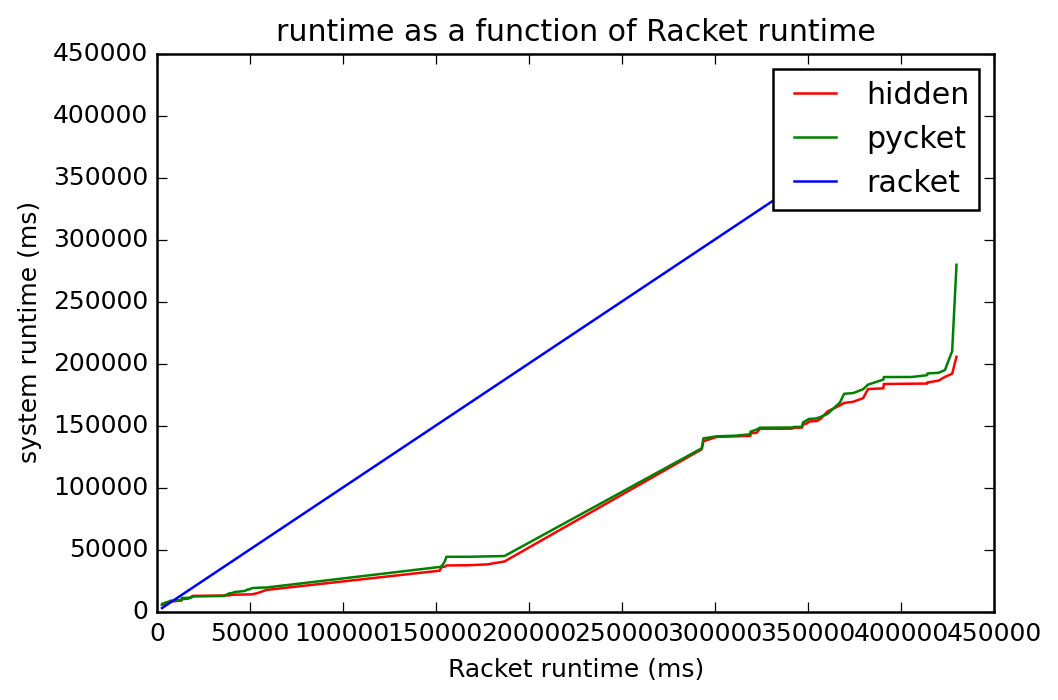

In [68]:
# Runtime of Pycket as a function of Racket
ordered_data = np.copy(data)
ordered_data.sort(axis=0)
ohidden = ordered_data[:,2]
opycket = ordered_data[:,1]
oracket = ordered_data[:,0]
pylab.plot(oracket, ohidden, 'r', label='hidden')
pylab.plot(oracket, opycket, 'g', label='pycket')
pylab.plot(oracket, oracket, 'b', label='racket')
pylab.title('runtime as a function of Racket runtime')
pylab.xlabel('Racket runtime (ms)')
pylab.ylabel('system runtime (ms)')
pylab.legend()

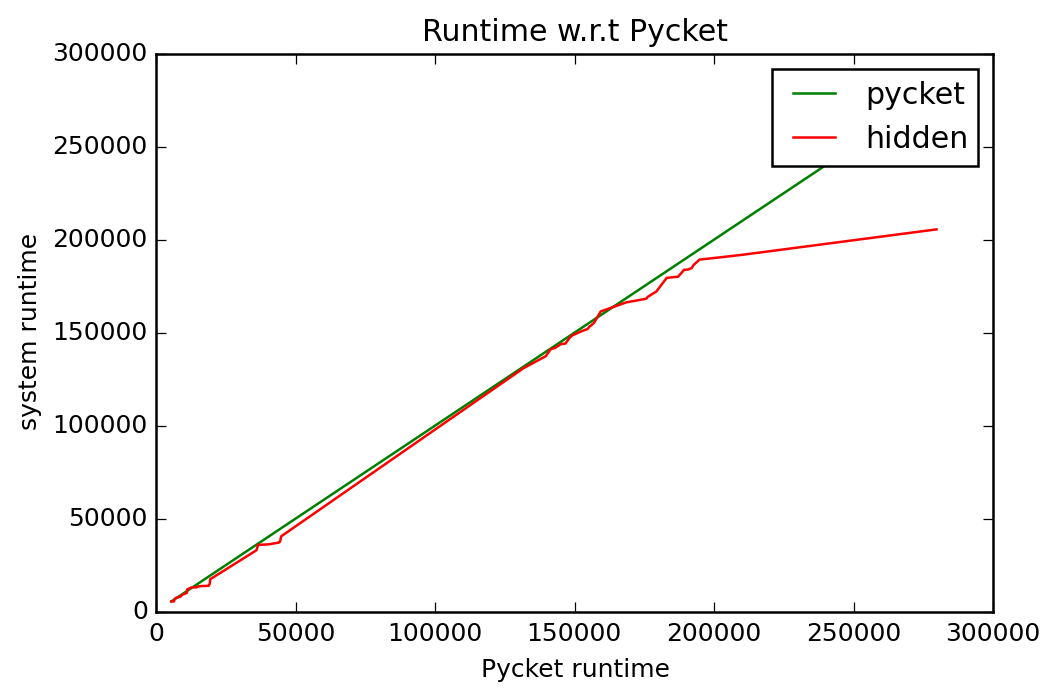

In [69]:
pylab.plot(opycket, opycket, 'g', label='pycket')
pylab.plot(opycket, ohidden, 'r', label='hidden')
pylab.title('Runtime w.r.t Pycket')
pylab.xlabel('Pycket runtime')
pylab.ylabel('system runtime')
pylab.legend()

In [70]:
from scipy.stats import cumfreq
from pandas      import DataFrame
from ipy_table   import *

hidden_slowdown = hidden / float(hidden_untyped)
pycket_slowdown = pycket / float(pycket_untyped)
racket_slowdown = racket / float(racket_untyped)

def compute_deliverable(data):
    th = sum(data < 3)
    oh = sum(numpy.logical_and(data >= 3, data < 10))
    return [max(data), numpy.mean(data), np.median(data), "%d (%0.2f%%)" % (th, th / float(len(data)) * 100), "%d (%0.2f%%)" % (oh, oh / float(len(data)) * 100)]

def make_data_table(**kwargs):
    lst = [["System", "Max overhead", "Mean overhead", "Median overhead", "300-deliverable", "300/1000-usable"]]
    for name, data in kwargs.iteritems():
        lst.append([name] + compute_deliverable(data))
    return make_table(map(list, zip(*lst)))

def slowdown_cdf(*args):
    for data, color, label in args:
        counts, bin_edges = numpy.histogram(data, bins=len(data))
        cdf = numpy.cumsum(counts)
        pylab.plot(bin_edges[1:], cdf, color=color, label=label)
    pylab.axvline(3, color='y')
    pylab.axvline(10, color='k')
    pylab.axhline(len(data) * 0.6, color='c', ls='--')
    pylab.xlabel('slowdown factor')
    pylab.xlim((1,20))
    pylab.ylim((0,len(racket)))
    pylab.ylabel('number below')
    pylab.legend()

# Slowdown Summary Stats

In [71]:
DataFrame({'racket':racket_slowdown, 'pycket':pycket_slowdown, 'hidden':hidden_slowdown}).describe()

,hidden,pycket,racket
count,64.000000,64.000000,64.000000
mean,16.671343,17.571899,49.413058
std,13.822789,14.571803,37.153576
min,0.999448,1.000000,0.638298
25%,2.505380,2.963273,10.112858
50%,15.746643,16.340311,55.493987
75%,28.826789,29.179001,82.726873
max,37.785360,51.805854,99.422757


# Deliverability Stats

## L = 0

In [72]:
make_data_table(racket=racket_slowdown,pycket=pycket_slowdown,hidden=hidden_slowdown)

System,racket,hidden,pycket
Max overhead,99.4228,37.7854,51.8059
Mean overhead,49.4131,16.6713,17.5719
Median overhead,55.4940,15.7466,16.3403
300-deliverable,6 (9.38%),23 (35.94%),17 (26.56%)
300/1000-usable,10 (15.62%),9 (14.06%),15 (23.44%)


## L = 1

In [73]:
slowdown_graph = lnm.mkgraph(variations, np.array(zip(racket_slowdown, pycket_slowdown, hidden_slowdown)))
graph1 = lnm.compute_lnm_times(slowdown_graph, L=1)
_, data1 = lnm.ungraph(graph1)
racket_slowdown1 = data1[:,0]
pycket_slowdown1 = data1[:,1]
hidden_slowdown1 = data1[:,2]
make_data_table(racket=racket_slowdown1,pycket=pycket_slowdown1,hidden=hidden_slowdown1)

System,racket,hidden,pycket
Max overhead,42.8261,6.9908,8.1803
Mean overhead,9.2927,2.5130,2.8596
Median overhead,4.2729,2.2135,2.1761
300-deliverable,22 (34.38%),56 (87.50%),42 (65.62%)
300/1000-usable,20 (31.25%),8 (12.50%),22 (34.38%)


## L = 2

In [74]:
graph2 = lnm.compute_lnm_times(slowdown_graph, L=2)
_, data2 = lnm.ungraph(graph2)
racket_slowdown2 = data2[:,0]
pycket_slowdown2 = data2[:,1]
hidden_slowdown2 = data2[:,2]
make_data_table(racket=racket_slowdown2,pycket=pycket_slowdown2,hidden=hidden_slowdown2)

System,racket,hidden,pycket
Max overhead,11.5236,2.5306,2.8903
Mean overhead,2.0849,1.5536,1.5577
Median overhead,0.8219,1.3000,1.2558
300-deliverable,46 (71.88%),64 (100.00%),64 (100.00%)
300/1000-usable,16 (25.00%),0 (0.00%),0 (0.00%)


# Slowdown distribution

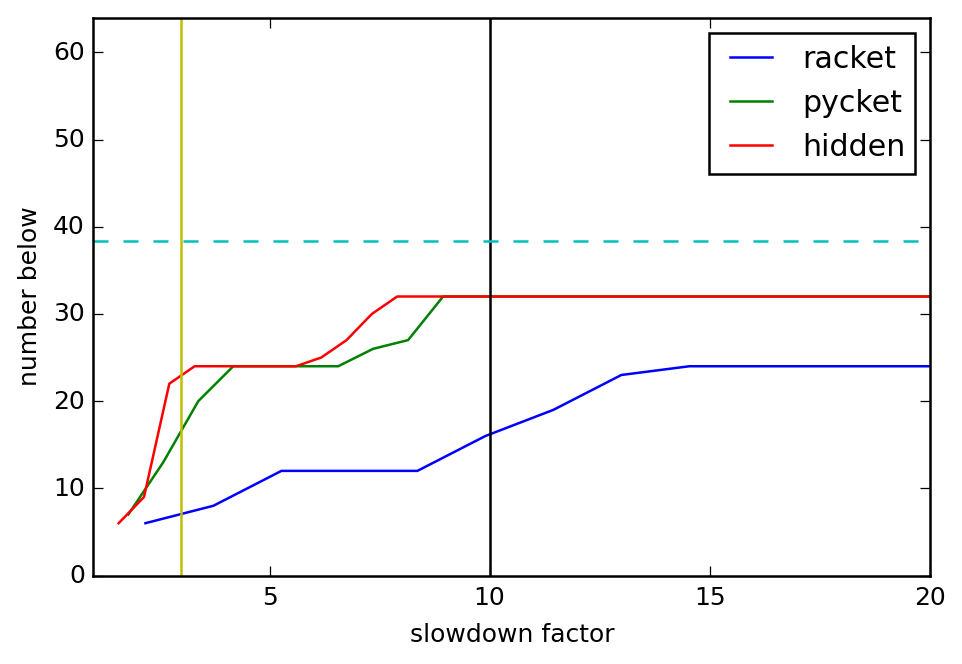

In [75]:
slowdown_cdf((racket_slowdown, 'b', 'racket'),
             (pycket_slowdown, 'g', 'pycket'),
             (hidden_slowdown, 'r', 'hidden'))

## L = 1

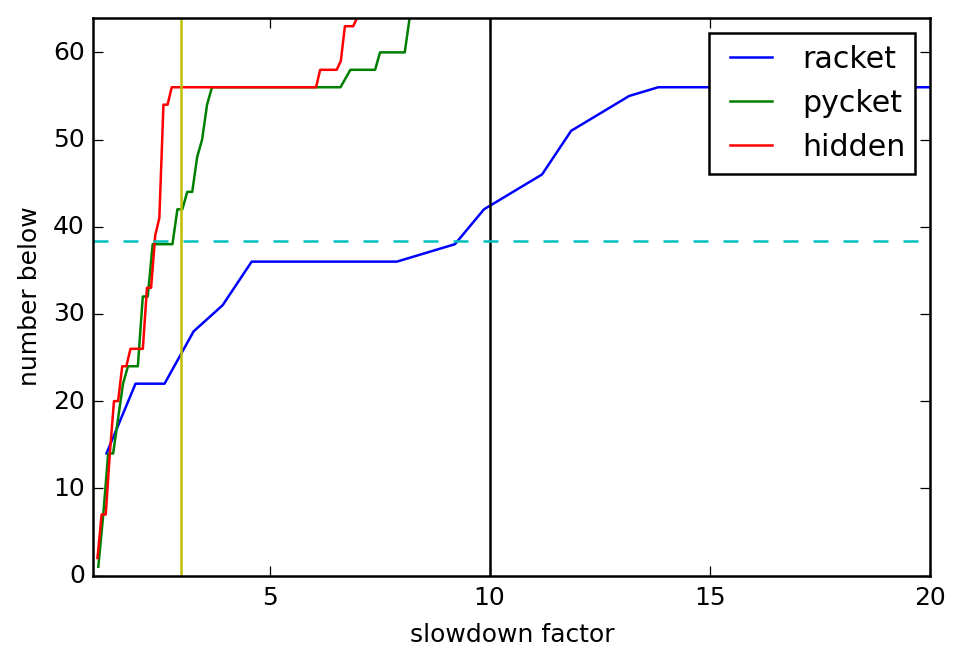

In [76]:
slowdown_cdf((racket_slowdown1, 'b', 'racket'),
             (pycket_slowdown1, 'g', 'pycket'),
             (hidden_slowdown1, 'r', 'hidden'))

## L = 2

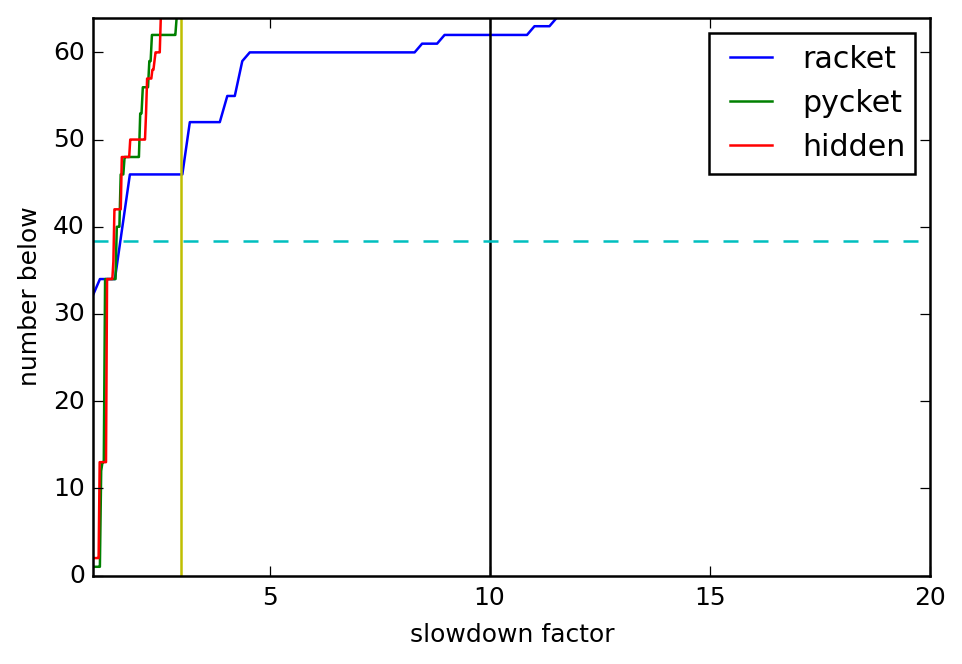

In [77]:
slowdown_cdf((racket_slowdown2, 'b', 'racket'),
             (pycket_slowdown2, 'g', 'pycket'),
             (hidden_slowdown2, 'r', 'hidden'))